In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('Telco_customer_churn.xlsx')

In [ ]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# EDA


## Is churn score a good indicator of churn result?

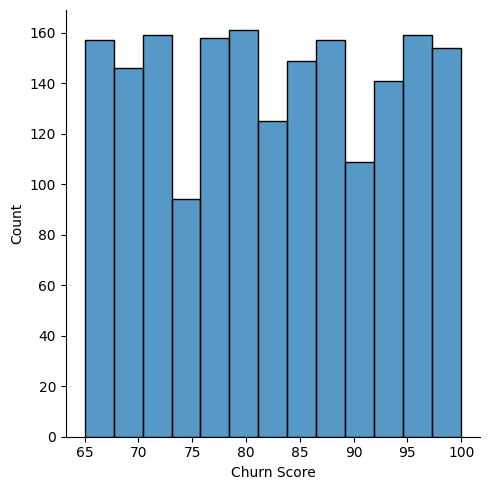

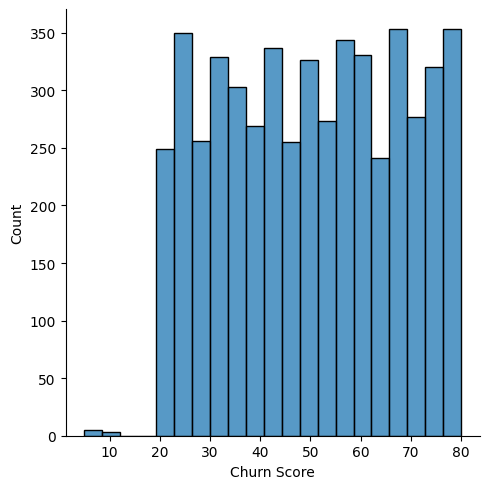

In [ ]:
sns.displot(data[data['Churn Value']==1]['Churn Score'], label='Churn')
sns.displot(data[data['Churn Value']==0]['Churn Score'], label='No Churn')
plt.show()

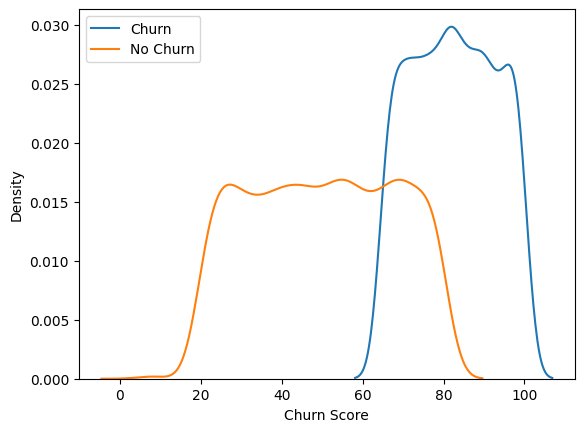

In [ ]:
sns.kdeplot(data[data['Churn Value']==1]['Churn Score'], label='Churn')
sns.kdeplot(data[data['Churn Value']==0]['Churn Score'], label='No Churn')
plt.legend()
plt.show()

In [ ]:
data[data['Churn Value']==1]['Churn Score'].min()

65

In [ ]:
churn_no_score_gte_65 = data[(data['Churn Value']==0)&(data['Churn Score']>=65)].shape[0]
churn_no = data[(data['Churn Value']==0)].shape[0]

churn_no_score_gte_65 / churn_no

0.26768457672980284

In [ ]:
data[(data['Churn Value']==0)&(data['Churn Score']>=65)].shape

(1385, 33)

In [ ]:
data[(data['Churn Value']==1)].shape

(1869, 33)

It can be observed that the churn score feature is able to draw a boundary to separate some of the data on the prediction whether the customer will churn or not. Setting a condition where we could predict that the cusotmer will churn based solely on the churn score will accurately predict all the  customers taht will churn. However, this approach will have a lot of false positive (~ 27% of not churn customers will be predicted as to be churn customers).

This suggests that we need a predictive model that will be able to accurately predict whether some will churn or not.

## Does the last month charge percent of the total charge amount affect the customer decision to churn?

In [ ]:
data[data['Total Charges'].apply(lambda x: isinstance(x, str))]['Total Charges']

2234     
2438     
2568     
2667     
2856     
4331     
4687     
5104     
5719     
6772     
6840     
Name: Total Charges, dtype: object

In [ ]:
data.drop(data[data['Total Charges'].apply(lambda x: isinstance(x, str))].index, inplace=True)

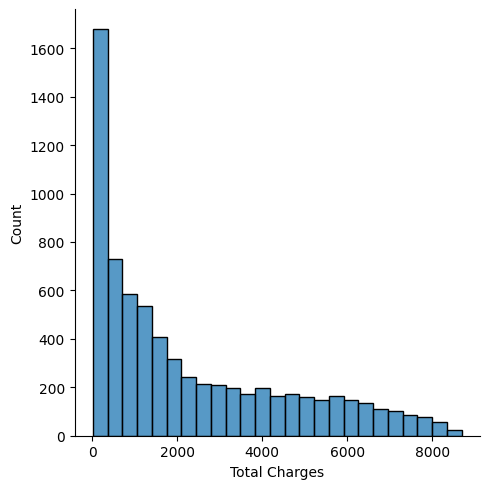

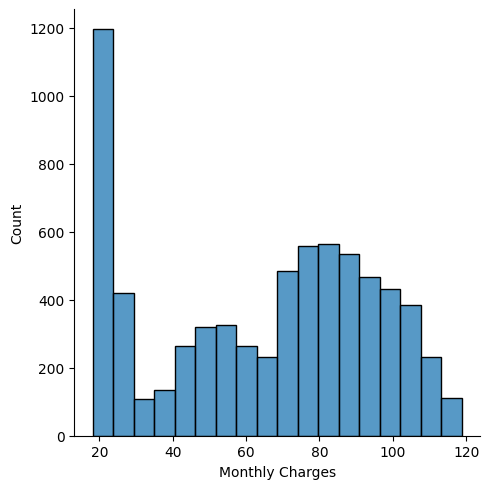

In [ ]:
sns.displot(data['Total Charges'], label='Total')
sns.displot(data['Monthly Charges'], label='Monthly Charge')

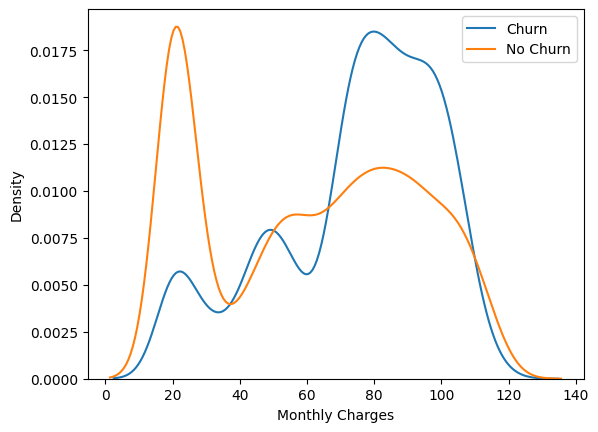

In [ ]:
sns.kdeplot(data[data['Churn Value']==1]['Monthly Charges'], label='Churn')
sns.kdeplot(data[data['Churn Value']==0]['Monthly Charges'], label='No Churn')
plt.legend()
plt.show()

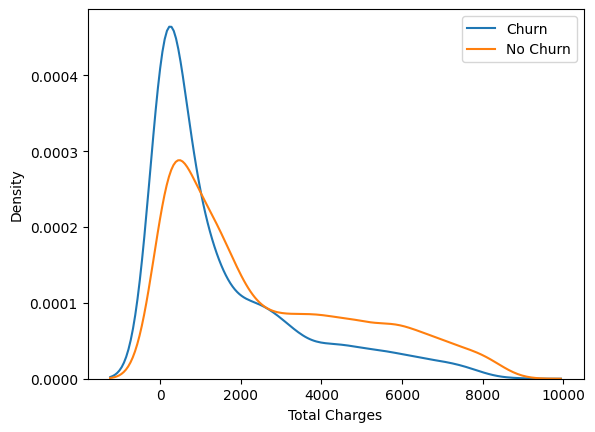

In [ ]:
sns.kdeplot(data[data['Churn Value']==1]['Total Charges'], label='Churn')
sns.kdeplot(data[data['Churn Value']==0]['Total Charges'].astype('float64'), label='No Churn')
plt.legend()
plt.show()

In [ ]:
data['last_month_percent'] = data['Monthly Charges'] / data['Total Charges']

**Hypothesis:** If the last months charges is very high relative to total charge for the quarter, the customer might be incentivized to leave. The distribution for no churn should be near the left side of the scale suggesting low percentage in the total charge while a churn outcome should have a very high percent value nearer the right part of the scale.

Can you mathematically prove that the churn vs no churn distributions for last month percent are statistically different?

Total charges -> total customer lifetime; not 1 quarter

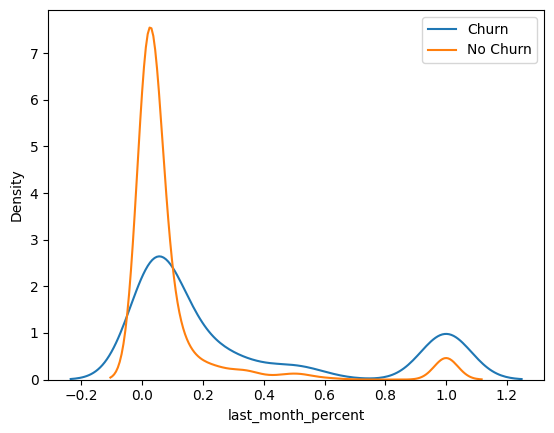

In [ ]:
sns.kdeplot(data[data['Churn Value']==1]['last_month_percent'], label='Churn')
sns.kdeplot(data[(data['Churn Value']==0)]['last_month_percent'], label='No Churn')
plt.legend()
plt.show()

**Outcome:** However, based on the above analysis there is no apparent pattern which would confirm the hypothesis.

In [ ]:
def group_category(data, var):
    print(data[var].value_counts(), '\n')
    print(data.groupby(['Churn Label', var])['CustomerID'].count())

In [ ]:
group_category(data, 'Gender')

Male      3549
Female    3483
Name: Gender, dtype: int64 

Churn Label  Gender
No           Female    2544
             Male      2619
Yes          Female     939
             Male       930
Name: CustomerID, dtype: int64


In [ ]:
group_category(data, 'Senior Citizen')

No     5890
Yes    1142
Name: Senior Citizen, dtype: int64 

Churn Label  Senior Citizen
No           No                4497
             Yes                666
Yes          No                1393
             Yes                476
Name: CustomerID, dtype: int64


If a customer is not a senior citizen then they are 3.2 times likely to not churn. But if a customer is a senior citizen, then they are only 1.4 times likely to not churn.

## Does the customer tenure have any impact on the churn? Are older customers less likely to churn than newer ones?

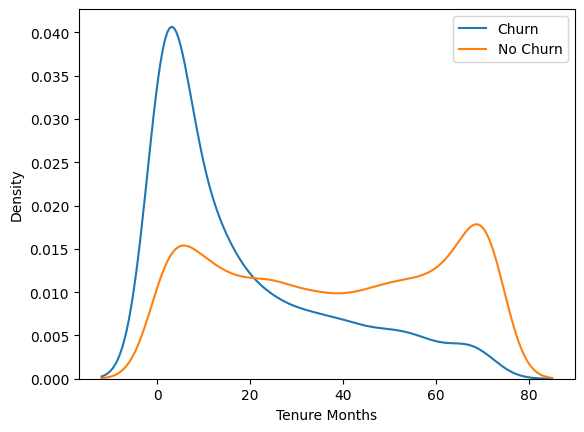

In [ ]:
sns.kdeplot(data[data['Churn Value']==1]['Tenure Months'], label='Churn')
sns.kdeplot(data[data['Churn Value']==0]['Tenure Months'], label='No Churn')
plt.legend()
plt.show()

A customer who has been for less time with the the company is more likely to churn. Low tenure -> more likely to churn.

## Does the region in the state affect the customer churn outcome? Are there any regions in the map that show high churn density in existing customers?

In [ ]:
zip_population = pd.DataFrame(data.groupby('Zip Code')['CustomerID'].count())
zip_population_churn = data[data['Churn Value']==1].groupby('Zip Code')['CustomerID'].count()
zip_population['Churned Customers'] = zip_population_churn
zip_population.fillna(0, inplace=True)
zip_population.reset_index(inplace = True)
zip_population['churn_density'] = zip_population['Churned Customers'] / zip_population['CustomerID']
zip_population.drop(['CustomerID', 'Churned Customers'], axis=1).sort_values('churn_density', ascending=False)

,Zip Code,churn_density
1651,96161,1.0
1077,95006,1.0
1259,95431,1.0
18,90020,1.0
1338,95567,1.0
...,...,...
1042,94922,0.0
1047,94929,0.0
1048,94930,0.0
460,92352,0.0


# Machine Learning

## Motivation to reduce false positives
- The churn score feature is good at prediciting the customers who will churn. But, it produces a lot of false positives which might be undesirable to follow up with due to couple of reasons.
    1. It can be expensive to approach cusomters or set up personalized marketing campaigns for a lot of people.
    2. What if a customer is a **sleeping dog**! Approaching them would not be the best idea.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB

!pip install catboost
from catboost import CatBoostClassifier

from xgboost import XGBClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.7 MB/s eta 0:00:00


## Pre-processing function

In [ ]:
def preprocess_data(data):

    ## Remove unused features
    data.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Lat Long', 'Latitude', \
               'Longitude', 'Zip Code', 'Churn Label', 'Churn Reason', 'CLTV'], axis=1, inplace=True)

    ## Drop rows from 'Total Charges' features which have empty string value
    data.drop(data[data['Total Charges'].apply(lambda x: isinstance(x, str))].index, inplace=True)

    ## Change data type of 'Total Charges' feature
    data['Total Charges'] = data['Total Charges'].astype('float64')

    ## Get list of all categorical features
    categorical_var = list(data.select_dtypes(include=['object']).columns)

    ## One-hot encode all categorical features
    data_numeric = data.drop(categorical_var + ['Churn Value'], axis=1).columns
    data_cat_ohe = pd.get_dummies(data[categorical_var])

    ## Scale numeric data
    scalar = MinMaxScaler()
    data[data_numeric] = scalar.fit_transform(data[data_numeric])

    data = pd.concat([data[data_numeric], data_cat_ohe, data[['Churn Value']]], axis=1)


    # sampler = RandomOverSampler(sampling_strategy='minority')
    # X, y = sampler.fit_resample(data.drop('Churn Value', axis=1), data[['Churn Value']])
    # data = pd.concat([X, y])


    return data

In [ ]:
data = pd.read_excel('Telco_customer_churn.xlsx')

In [ ]:
churn = pd.read_excel('/content/Telco_customer_churn.xlsx')
demo = pd.read_excel('/content/Telco_customer_churn_demographics.xlsx')
loc = pd.read_excel('/content/Telco_customer_churn_location.xlsx')
pop = pd.read_excel('/content/Telco_customer_churn_population.xlsx')
services = pd.read_excel('/content/Telco_customer_churn_services.xlsx')
stat = pd.read_excel('/content/Telco_customer_churn_status.xlsx')



data = pd.merge(churn, demo[list(set(demo.columns) - set(churn.columns))], how='inner', left_on='CustomerID', right_on='Customer ID')
data = pd.merge(data, pop[['Zip Code', 'Population']], how='inner', left_on='Zip Code', right_on='Zip Code')
cols = list(set(services.columns) - set(data.columns)) + ['Customer ID']
data = pd.merge(data, services[cols], how='inner', left_on='Customer ID', right_on='Customer ID')
data = data.drop(['Tenure in Months', 'Customer ID'], axis=1)

In [ ]:
data_p = preprocess_data(data.copy())
X = data_p.drop('Churn Value', axis=1)
y = data_p[['Churn Value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Uncomment to re-run GridSearch

In [ ]:
# log_reg_para = {"C":np.logspace(-3,3,7), "penalty":["l2"]}
# svc_para = {'C': [0.1,1, 10],'kernel': ['rbf', 'poly']}
# rf_para = {'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth' : [4,7,8]}
# catb_para = {'depth': [4,6,7,10], 'learning_rate':[0.02,0.04]}
# xgb_para = {'min_child_weight': [1, 5, 10], 'max_depth': [3, 5]}

In [ ]:
# log_reg = GridSearchCV(LogisticRegression(max_iter=100000), log_reg_para, cv=3)
# log_reg.fit(X_train, y_train)
# log_reg_best_para = log_reg.best_estimator_.get_params()
# print(log_reg_best_para)

# svc = GridSearchCV(SVC(), svc_para, cv=3)
# svc.fit(X_train, y_train)
# svc_best_para = svc.best_estimator_.get_params()
# print(svc_best_para)

# rf = GridSearchCV(RandomForestClassifier(), rf_para, cv=3)
# rf.fit(X_train, y_train)
# rf_best_para = rf.best_estimator_.get_params()
# print(rf_best_para)


# # No hypertuning on NB
# # https://stats.stackexchange.com/questions/299842/why-grid-search-is-not-performed-for-naive-bayes-classifier


# catb = GridSearchCV(CatBoostClassifier(verbose=False), catb_para, cv=3)
# catb.fit(X_train, y_train)
# catb_best_para = catb.best_estimator_.get_params()
# print(catb_best_para)


# xgb = GridSearchCV(XGBClassifier(), xgb_para, cv=3)
# xgb.fit(X_train, y_train)
# xgb_best_para = xgb.best_estimator_.get_params()
# print(xgb_best_para)

## Best parameter values

In [ ]:
log_reg_best_para={'C': 10.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, \
                   'max_iter': 100000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', \
                   'tol': 0.0001, 'verbose': 0, 'warm_start': False}
svc_best_para={'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', \
               'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, \
               'shrinking': True, 'tol': 0.001, 'verbose': False}
rf_best_para={'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', \
              'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2,
              'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None,
              'verbose': 0, 'warm_start': False}
catb_best_para={'learning_rate': 0.02, 'depth': 4, 'verbose': False}
xgb_best_para={'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, \
               'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, \
               'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, \
               'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, \
               'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, \
               'min_child_weight': 1, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, \
               'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, \
               'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

## Training & testing with best parameters

In [ ]:
results = {'f1_score': dict(), 'roc_auc_score': dict(), 'sensitivity': dict(), 'specificity': dict()}

In [ ]:
logreg = LogisticRegression(**log_reg_best_para)
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
results['f1_score']['logreg'] = f1_score(y_test, predictions)
results['roc_auc_score']['logreg'] = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
results['specificity']['logreg'] = tn / (tn+fp)
results['sensitivity']['logreg'] = tp / (tp+fn)
prob = logreg.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svc = SVC(**svc_best_para)
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)
results['f1_score']['svc'] = f1_score(y_test, predictions)
results['roc_auc_score']['svc'] = roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1])
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
results['specificity']['svc'] = tn / (tn+fp)
results['sensitivity']['svc'] = tp / (tp+fn)
prob += svc.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
rf = RandomForestClassifier(**rf_best_para)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
results['f1_score']['rf'] = f1_score(y_test, predictions)
results['roc_auc_score']['rf'] = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
results['specificity']['rf'] = tn / (tn+fp)
results['sensitivity']['rf'] = tp / (tp+fn)
prob += rf.predict_proba(X_test)[:, 1]

<ipython-input-10-2fbda472f7b0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [ ]:
xgb = XGBClassifier(**xgb_best_para)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
results['f1_score']['xgb'] = f1_score(y_test, predictions)
results['roc_auc_score']['xgb'] = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
results['specificity']['xgb'] = tn / (tn+fp)
results['sensitivity']['xgb'] = tp / (tp+fn)
prob += xgb.predict_proba(X_test)[:, 1]

In [ ]:
catb = CatBoostClassifier(**catb_best_para)
catb.fit(X_train, y_train)
predictions = catb.predict(X_test)
results['f1_score']['catb'] = f1_score(y_test, predictions)
results['roc_auc_score']['catb'] = roc_auc_score(y_test, catb.predict_proba(X_test)[:, 1])
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
results['specificity']['catb'] = tn / (tn+fp)
results['sensitivity']['catb'] = tp / (tp+fn)
prob += catb.predict_proba(X_test)[:, 1]

In [ ]:
catnb = CategoricalNB()
catnb.fit(X_train, y_train)
predictions = catnb.predict(X_test)
results['f1_score']['catnb'] = f1_score(y_test, predictions)
results['roc_auc_score']['catnb'] = roc_auc_score(y_test, catnb.predict_proba(X_test)[:, 1])
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
results['specificity']['catnb'] = tn / (tn+fp)
results['sensitivity']['catnb'] = tp / (tp+fn)
prob += catnb.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IndexError: ignored

In [ ]:
avg_prob = prob / 6

## Results

In [ ]:
results

{'f1_score': {'logreg': 0.8586666666666668,
  'svc': 0.8559892328398385,
  'rf': 0.29977628635346754,
  'xgb': 0.8579088471849866,
  'catb': 0.8870967741935485},
 'roc_auc_score': {'logreg': 0.9802834210025658,
  'svc': 0.9763344491235647,
  'rf': 0.9020752669926625,
  'xgb': 0.9842195381553982,
  'catb': 0.985687547883855},
 'sensitivity': {'logreg': 0.8518518518518519,
  'svc': 0.8412698412698413,
  'rf': 0.17724867724867724,
  'xgb': 0.8465608465608465,
  'catb': 0.873015873015873},
 'specificity': {'logreg': 0.9514091350826045,
  'svc': 0.9543245869776482,
  'rf': 0.9980563654033042,
  'xgb': 0.9533527696793003,
  'catb': 0.9650145772594753}}

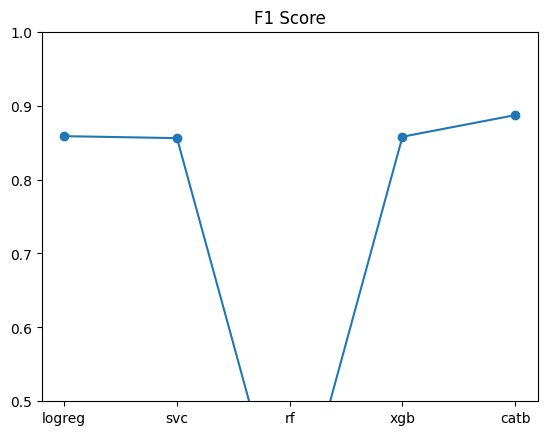

In [ ]:
plt.plot(results['f1_score'].keys(), results['f1_score'].values(), 'o-')
plt.title('F1 Score')
plt.ylim(0.5, 1)
plt.show()

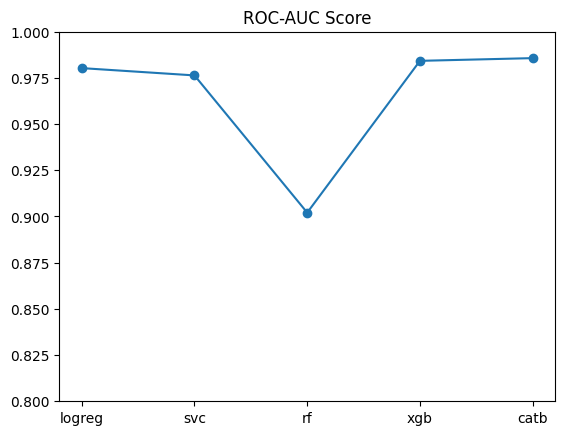

In [ ]:
plt.plot(results['roc_auc_score'].keys(), results['roc_auc_score'].values(), 'o-')
plt.title('ROC-AUC Score')
plt.ylim(0.8, 1)
plt.show()

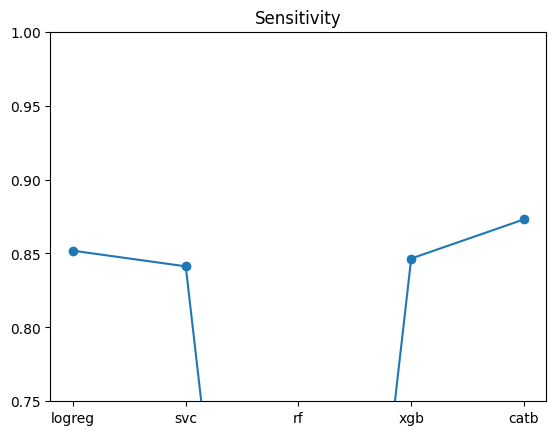

In [ ]:
plt.plot(results['sensitivity'].keys(), results['sensitivity'].values(), 'o-')
plt.title('Sensitivity')
plt.ylim(0.75, 1)
plt.show()

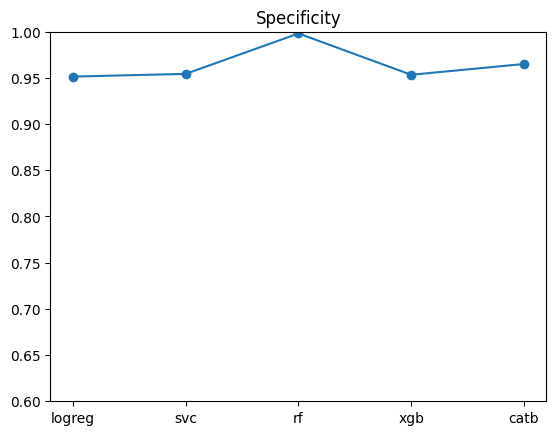

In [ ]:
plt.plot(results['specificity'].keys(), results['specificity'].values(), 'o-')
plt.title('Specificity')
plt.ylim(0.6, 1)
plt.show()

### Receiver Operator Curve

In [ ]:
def plot_roc_curve(true_y, y_prob, model):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr, label=f'{model}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

NameError: ignored

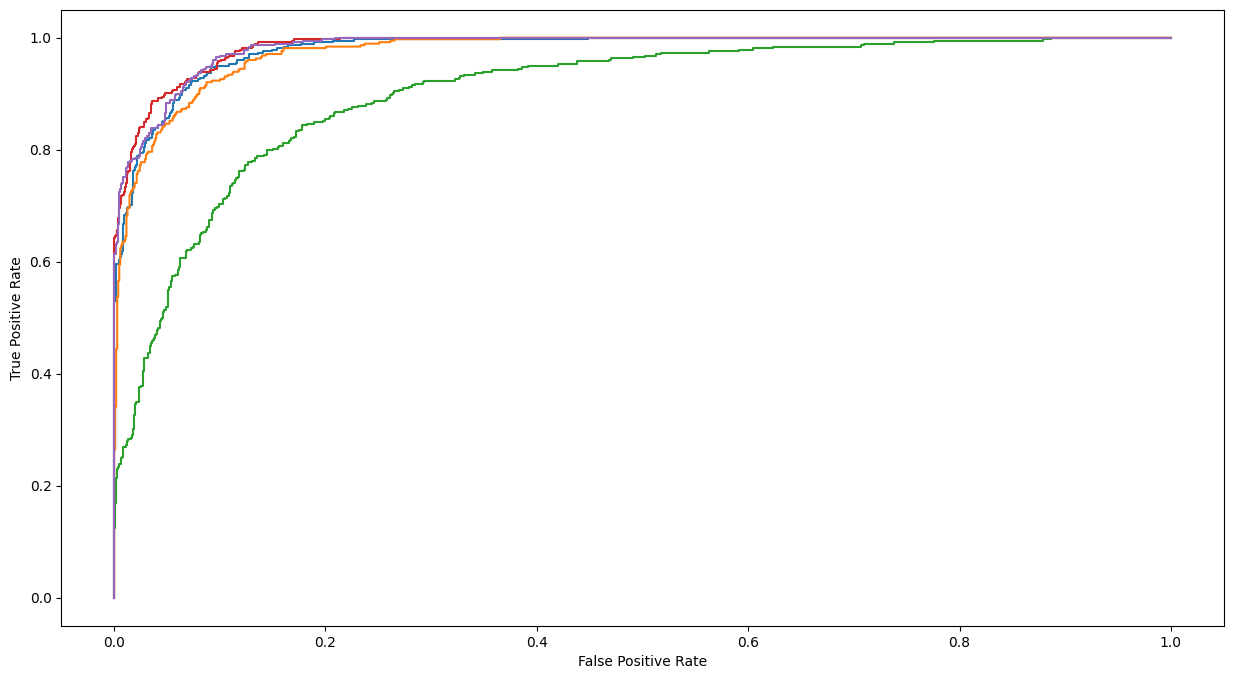

In [ ]:
plt.figure(figsize=(15,8))
plot_roc_curve(y_test, logreg.predict_proba(X_test)[:, 1], 'logreg')
plot_roc_curve(y_test, svc.predict_proba(X_test)[:, 1], 'svc')
plot_roc_curve(y_test, rf.predict_proba(X_test)[:, 1], 'rf')
plot_roc_curve(y_test, catb.predict_proba(X_test)[:, 1], 'catb')
plot_roc_curve(y_test, xgb.predict_proba(X_test)[:, 1], 'xgb')
plot_roc_curve(y_test, avg_prob, 'Average model')
plt.title('Comparison of Receiver Operator Curves')
plt.legend()
plt.show()

In [ ]:
results_df = pd.DataFrame(
  index = results['f1_score'].keys()
)

In [ ]:
results_df['f1_score'] = results['f1_score'].values()
results_df['roc_auc_score'] = results['roc_auc_score'].values()
results_df['sensitivity'] = results['sensitivity'].values()
results_df['specificity'] = results['specificity'].values()

In [ ]:
results_df.T

,logreg,svc,rf,xgb,catb
f1_score,0.858667,0.855989,0.299776,0.857909,0.887097
roc_auc_score,0.980283,0.976334,0.902075,0.984220,0.985688
sensitivity,0.851852,0.841270,0.177249,0.846561,0.873016
specificity,0.951409,0.954325,0.998056,0.953353,0.965015


## Feature importance

In [ ]:
pd.DataFrame(data=rf.feature_importances_, index=X_test.columns, columns=['% Importance']).sort_values(by='% Importance', ascending=False)

## Running Random Forest without churn score

In [ ]:
rf = RandomForestClassifier(**rf_best_para)
rf.fit(X_train.drop('Churn Score', axis=1), y_train)
predictions = rf.predict(X_test.drop('Churn Score', axis=1))
print(f"\n\nF1 score\nBefore: {results['f1_score']['rf']}, After: {f1_score(y_test, predictions)}")
print(f"AUC score\nBefore: {results['roc_auc_score']['rf']}, After: {roc_auc_score(y_test, rf.predict_proba(X_test.drop('Churn Score', axis=1))[:, 1])}")
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"specificity\nBefore: {results['specificity']['rf']},  After: {tn / (tn+fp)}")
print(f"sensitivity\nBefore: {results['sensitivity']['rf']}, After: {tp / (tp+fn)}")

<ipython-input-52-0c3daba6fdbf>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train.drop('Churn Score', axis=1), y_train)




F1 score
Before: 0.8481375358166189, After: 0.6130500758725341
AUC score
Before: 0.9686442589668396, After: 0.8602127612749171
specificity
Before: 0.9427767354596623,  After: 0.8911819887429644
sensitivity
Before: 0.8680351906158358, After: 0.592375366568915


In [ ]:
pd.DataFrame(data=rf.feature_importances_, index=X_test.drop('Churn Score', axis=1).columns, columns=['% Importance']).sort_values(by='% Importance', ascending=False)

,% Importance
Tenure Months,0.123528
Contract_Month-to-month,0.115867
Total Charges,0.097560
Online Security_No,0.071244
Tech Support_No,0.065615
Monthly Charges,0.063783
Internet Service_Fiber optic,0.051707
Dependents_Yes,0.044688
Contract_Two year,0.044531
Payment Method_Electronic check,0.036081
